In [1]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt 
# Importing the dataset
df = pd.read_csv('tmdb_movies_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   homepage              2936 non-null   object 
 6   director              10822 non-null  object 
 7   tagline               8042 non-null   object 
 8   keywords              9373 non-null   object 
 9   overview              10862 non-null  object 
 10  runtime               10866 non-null  int64  
 11  genres                10843 non-null  object 
 12  production_companies  9836 non-null   object 
 13  release_date          10866 non-null  object 
 14  vote_count            10866 non-null  int64  
 15  vote_average       

In [2]:
# Display the shape of the dataset
df.shape

(10866, 19)

In [3]:
df.head()

,id,imdb_id,popularity,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
# Any column that has almost all values unique should be dropped
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [5]:
# dropped useless columns
df.drop(['id', 'imdb_id', 'original_title', 'homepage', 'director','cast', 'tagline', 'keywords','overview', 'runtime', 'release_date', 'production_companies', 'release_year' ], axis=1, inplace=True)
df = df.drop(df[df.budget_adj <= 0].index,axis=0) 
df = df.drop(df[df.revenue_adj <= 0].index,axis=0) 
df.head()

,popularity,genres,vote_count,vote_average,budget_adj,revenue_adj
0,32.985763,Action|Adventure|Science Fiction|Thriller,5562,6.5,137999939.3,1.392446e+09
1,28.419936,Action|Adventure|Science Fiction|Thriller,6185,7.1,137999939.3,3.481613e+08
2,13.112507,Adventure|Science Fiction|Thriller,2480,6.3,101199955.5,2.716190e+08
3,11.173104,Action|Adventure|Science Fiction|Fantasy,5292,7.5,183999919.0,1.902723e+09
4,9.335014,Action|Crime|Thriller,2947,7.3,174799923.1,1.385749e+09


In [6]:
# Net profit which is the difference between (revenue_adj – budget_adj)
profit = df['revenue_adj']- df['budget_adj']
df['net_profit'] = profit
df.head()

,popularity,genres,vote_count,vote_average,budget_adj,revenue_adj,net_profit
0,32.985763,Action|Adventure|Science Fiction|Thriller,5562,6.5,137999939.3,1.392446e+09,1.254446e+09
1,28.419936,Action|Adventure|Science Fiction|Thriller,6185,7.1,137999939.3,3.481613e+08,2.101614e+08
2,13.112507,Adventure|Science Fiction|Thriller,2480,6.3,101199955.5,2.716190e+08,1.704191e+08
3,11.173104,Action|Adventure|Science Fiction|Fantasy,5292,7.5,183999919.0,1.902723e+09,1.718723e+09
4,9.335014,Action|Crime|Thriller,2947,7.3,174799923.1,1.385749e+09,1.210949e+09


In [7]:
# We apply One-Hot Encoding when:

# 1-The categorical feature is not ordinal (like the countries above)
# 2-The number of categorical features is less so one-hot encoding can be effectively applied.

# We apply Label Encoding when:

# 1-The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
# 2-The number of categories is quite large as one-hot encoding can lead to high memory consumption.
###########################################################################################################################

# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(categories=[1])
# X = df['genres'].values
# X = X.reshape(-1, 1)
# df['genres'] = ohe.fit_transform(X).toarray()

# Convert categorical variable into dummy/indicator variables 
# df = pd.get_dummies(sep='|')

# importing label encoder (any column that is categorical should be converted into numerical)
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
df['genres']= label_encoder.fit_transform(df['genres'].astype(str)) 
df

,popularity,genres,vote_count,vote_average,budget_adj,revenue_adj,net_profit
0,32.985763,74,5562,6.5,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,74,6185,7.1,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,346,2480,6.3,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,73,5292,7.5,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,131,2947,7.3,1.747999e+08,1.385749e+09,1.210949e+09
...,...,...,...,...,...,...,...
10822,0.670274,548,74,7.5,5.038511e+07,2.266436e+08,1.762585e+08
10828,0.402730,877,46,6.3,2.015404e+07,8.733419e+07,6.718015e+07
10829,0.395668,216,36,6.9,3.125892e+07,4.030809e+07,9.049166e+06
10835,0.299911,52,28,7.0,8.061618e+07,1.343603e+08,5.374412e+07


In [8]:
# Check corr
df.corr()

,popularity,genres,vote_count,vote_average,budget_adj,revenue_adj,net_profit
popularity,1.000000,-0.069895,0.780106,0.317924,0.399375,0.546985,0.516896
genres,-0.069895,1.000000,-0.090127,0.051096,-0.215284,-0.122156,-0.086323
vote_count,0.780106,-0.090127,1.000000,0.387271,0.497988,0.654713,0.614090
vote_average,0.317924,0.051096,0.387271,1.000000,0.036913,0.266996,0.288795
budget_adj,0.399375,-0.215284,0.497988,0.036913,1.000000,0.570466,0.404370
revenue_adj,0.546985,-0.122156,0.654713,0.266996,0.570466,1.000000,0.981856
net_profit,0.516896,-0.086323,0.614090,0.288795,0.404370,0.981856,1.000000


In [9]:
# isnull?
df.isna().sum() 

popularity      0
genres          0
vote_count      0
vote_average    0
budget_adj      0
revenue_adj     0
net_profit      0
dtype: int64

In [10]:
# Drop nulls
df.dropna(inplace=True)

In [11]:
# isduplicated?
sum(df.duplicated()) 

1

In [12]:
# Replace duplicates
df.drop_duplicates(inplace=True)

In [13]:
# After cleaning the data we normalize it
def normalization():
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        df[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        
# using MinMaxScaler functionality to normalize data        
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(df)
# df_normalized = pd.DataFrame(x_scaled)
# print(df_normalized)

In [14]:
normalization()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    3854 non-null   float64
 1   genres        3854 non-null   float64
 2   vote_count    3854 non-null   float64
 3   vote_average  3854 non-null   float64
 4   budget_adj    3854 non-null   float64
 5   revenue_adj   3854 non-null   float64
 6   net_profit    3854 non-null   float64
dtypes: float64(7)
memory usage: 240.9 KB


In [16]:
# Extracting the Independent and Dependent variables

X = df.loc[:,['genres','popularity','vote_average','vote_count']].values #indepedent variables Label Encoding

# X = df.drop(['budget_adj','revenue_adj','net_profit'],axis=1) #indepedent variables One-Hot Encoding 
Y = df.loc[:,['net_profit']].values #dependent variables(target)

# One Hot Encoding:print(X) 
# Label Encoding:
print(X[0])

[0.07034221 1.         0.69354839 0.56902736]


In [17]:
# Displaying dataFrame after extracting the Independent and Dependent variables
print(X)

[[0.07034221 1.         0.69354839 0.56902736]
 [0.07034221 0.8615772  0.79032258 0.63287896]
 [0.32889734 0.39749979 0.66129032 0.25315158]
 ...
 [0.20532319 0.01196166 0.75806452 0.00266475]
 [0.04942966 0.00905858 0.77419355 0.00184483]
 [0.32604563 0.00624957 0.72580645 0.0032797 ]]


In [18]:
# Split the dataset for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 10) 

In [19]:
# Display the shape of our dataset
print("Shape of X_train :", X.shape)
print("Shape of Y_train :", Y.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of Y_test :", Y_test.shape)

Shape of X_train : (3854, 4)
Shape of Y_train : (3854, 1)
Shape of X_test : (771, 4)
Shape of Y_test : (771, 1)


In [20]:
# y_pred = theta n, x n + tehta n-1, x n-1 +theta n-2, x n-2+...+theta 2, x 2 + theta 1, x 1 + theta 0
# y_pred = matrix_mul(X, theta)
# The reason for doing so is that we are multiplying θ 2 with x 2 , θ1 with x 1 and there is no X0 to multiple with θ 0 . 
# So we will add 1 at the place of X0.

# Reshapeing the date frame
Y_train = np.array(Y_train) 
Y_train = Y_train.reshape(Y_train.shape[0], 1) 

Y_test = np.array(Y_test) 
Y_test = Y_test.reshape(Y_test.shape[0], 1) 

X_train = np.vstack((np.ones((X_train.shape[0], )), X_train.T)).T
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T 

In [21]:
# Multiple Linear Regression Model from scartch

# 1. I'm taking four parameters X, Y, learning rate (which is alpha) and
# iterations. Iterations specifies how many times we want to run the loop.
# 2. Define m as the size of the data set(which is currently 1200).
# 3. And theta will be the vector of zeros. so it will be a matrix of size (n,1) where n is the number of features. 
# so basically of the size (70, 1)
# 4. We are running the loop for iteration time. And in every iteration
# we will compute our above 4 equations.
# 5. We will also keep track of our cost at every iteration, by maintaining a cost_list.
# 6. And finally, return the theta parameter (which will be trained) and cost_list.

def model(X, Y, learning_rate, iteration):
    
  m = Y.size
  theta = np.zeros((X.shape[1], 1))
    
  cost_list = []

  for i in range(iteration):
        
    y_pred = np.dot(X, theta)
    cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
    d_theta = (1/m)*np.dot(X.T, y_pred - Y)
    theta = theta - learning_rate*d_theta
    cost_list.append(cost)
    
    # to print the cost for 10 times
    if(i%(iteration/10) == 0):
      print("Cost is :", cost)
    
  return theta, cost_list

In [22]:
# Calling our model
iteration = 10000
learning_rate = 0.1
theta, cost_list = model(X_train, Y_train, learning_rate = learning_rate, iteration = iteration)

Cost is : 0.014972870351084399
Cost is : 0.0013198650298715472
Cost is : 0.0012344639790757145
Cost is : 0.0012142527563526683
Cost is : 0.0012089387217976346
Cost is : 0.0012074843420594025
Cost is : 0.0012070651333543469
Cost is : 0.0012069279901482316
Cost is : 0.001206869892174025
Cost is : 0.0012068357345436187


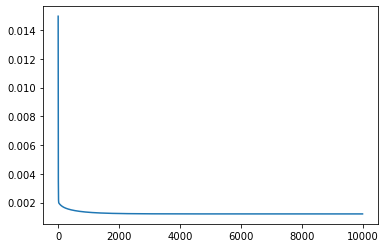

In [23]:
# Plot a graph of cost vs iteration
rng = np.arange(0, iteration)
plt.plot(rng, cost_list)
plt.show()
# Conc: We can see our cost decreasing with every iteration.

In [24]:
# Fromula: error = (1/m) * ∑|y_pred−Y|
y_pred = np.dot(X_test, theta)
error = (1/X_test.shape[0]) * np.sum(np.abs(y_pred - Y_test))

In [25]:
print("Test error is :", error*100, "%")
print("Test accuracy is :", (1- error)*100, "%")

Test error is : 2.4763086960933443 %
Test accuracy is : 97.52369130390666 %
